In [1]:
import os
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
data = './data/'

### Just some matplotlib and seaborn parameter tuning

In [3]:
fig_x = 30
fig_y = 11
axistitlesize = 22
axisticksize_date = 13
axisticksize_y = 18
axislabelsize = 30
axistextsize = 14
axislegendsize = 20
axiscbarfontsize = 15

# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

mpl.rcParams.update({'figure.autolayout': False})

# Seaborn style settings
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

# Colorpalettes, colormaps, etc.
sns.set_palette(palette='rocket')

## 1. Preprocess data

### Read ping files

In [4]:
os.listdir(data)

['www_elte_hu.txt',
 'immigration_ca_ping_2.txt',
 'canada_ca_ping.txt',
 'canada_ca_ping_2.txt',
 'immigration_ca_ping.txt']

In [5]:
def read_ping_file(file_name):
    
    dc = []
    with open(data + file_name, 'r') as f:
        header = f.readline()
        print(header)
        for i, line in enumerate(f):
            elems = line.split(' ')
            ts = float(elems[0].strip('[]'))   # Unix timestamp
            ts = datetime.utcfromtimestamp(ts) # Create datetime values
            b = float(elems[1])                # Packet size used to ping host
            h = elems[4]                       # Pinged host's name
            hip = elems[5].strip('():')        # Pinged host's IP address
            p = float(elems[8].strip('time=')) # Ping in ms
            dc.append([ts, b, h, hip, p])
    df = pd.DataFrame(data=dc, columns=['Timestamp',
                                        'Packet size [byte]',
                                        'Host name',
                                        'Host IP',
                                        'Ping [ms]'])
    return df

In [6]:
df_1_1 = read_ping_file(file_name='canada_ca_ping.txt')
df_2_1 = read_ping_file(file_name='immigration_ca_ping.txt')
df_1_2 = read_ping_file(file_name='canada_ca_ping_2.txt')
df_2_2 = read_ping_file(file_name='immigration_ca_ping_2.txt')

PING canada.ca (205.193.215.159) 56(84) bytes of data.

PING immigration.ca (104.26.2.199) 56(84) bytes of data.

PING canada.ca (205.193.215.159) 56(84) bytes of data.

PING immigration.ca (104.26.2.199) 56(84) bytes of data.



### Create appropriate date ticks

In [7]:
from matplotlib import ticker
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.ticker as plticker

In [8]:
date_format = mdates.DateFormatter('%b %d \'%y - %H:%M')

In [9]:
def create_date_ticks(df, N=22):
    """
    Create a list of string date ticks to use them on a figure.
    """
    dates = df['Timestamp']
    date_ticks = pd.date_range(min(dates), max(dates), periods=N).to_numpy()
    
    return date_ticks

In [13]:
def visualize_ping_series(df):
    
    fig, axes = plt.subplots(figsize=(fig_x,fig_y),
                             facecolor='black', subplot_kw={'facecolor' : 'black'})
    
    sr = 3
    x = df['Timestamp']
    y = df['Ping [ms]']
    c = cm.magma(y/y.max()/2 + 0.5)
    axes.scatter(x, y,
                 c=c, alpha=0.4, s=sr**2)
    
    # X ticks denoting timestamps
    date_ticks = create_date_ticks(df, N=20)
    axes.set_xticks(date_ticks)
    axes.set_xticklabels(date_ticks, rotation=62, ha='center')
    axes.xaxis.set_major_formatter(date_format)
    axes.set_xlim(date_ticks[0], date_ticks[-1])
    axes.set_xlabel('Timestamp of ping', fontsize=axislabelsize, fontweight='bold',
                    color='white')
    axes.tick_params(axis='x', which='major', labelsize=axisticksize_date,
                     colors='white')
    
    # Y ticks denoting ping in [ms]
    loc = plticker.MultipleLocator(base=5.0) # this locator puts ticks at regular intervals
    axes.yaxis.set_major_locator(loc)
    axes.set_ylabel('Ping [ms]', fontsize=axislabelsize, fontweight='bold',
                    color='white')
    axes.tick_params(axis='y', which='major', labelsize=axisticksize_y,
                     colors='white')

    plt.show()

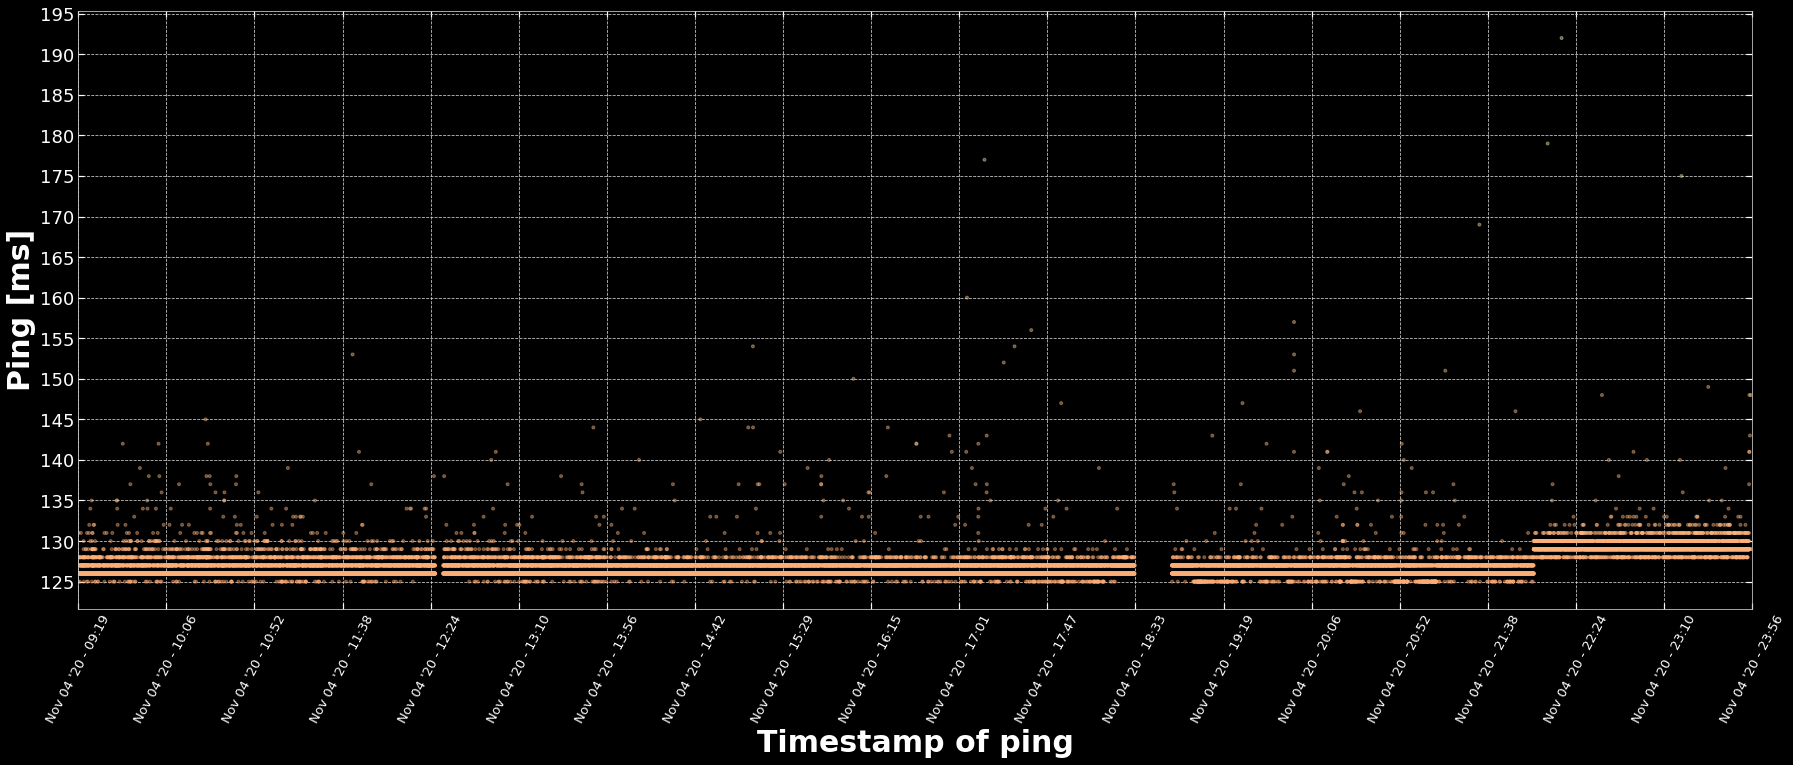

In [14]:
visualize_ping_series(df=df_1_1)

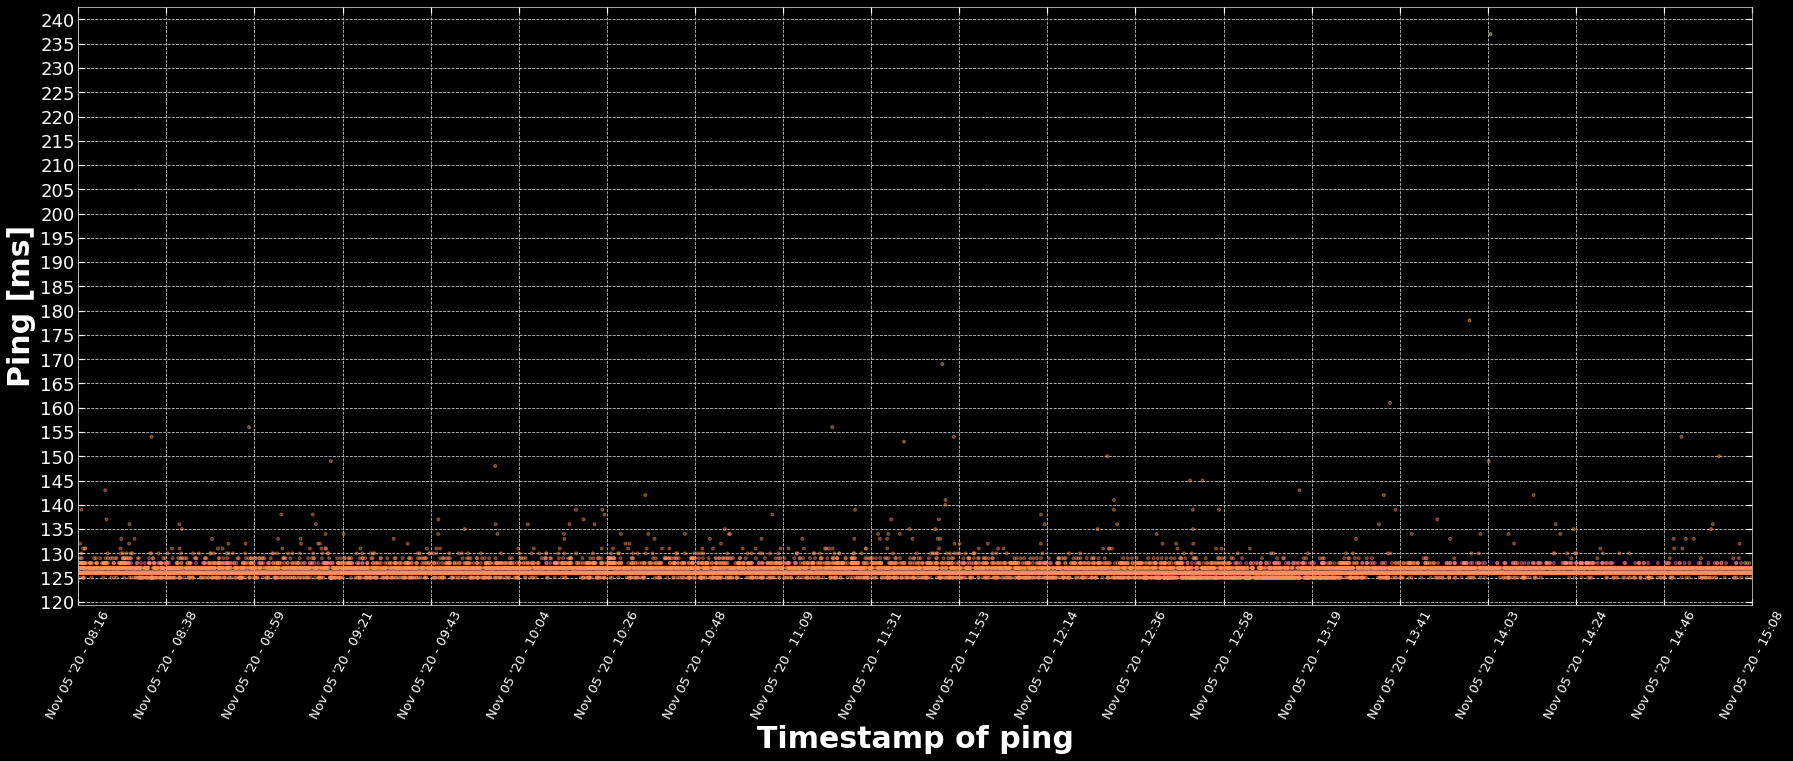

In [15]:
visualize_ping_series(df=df_1_2)